In [1]:
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Ingestion

In [2]:
movie1_temp = pd.read_csv('movie1.csv')
movie2_temp = pd.read_csv('movie2.csv')
movie3_temp = pd.read_csv('movie3.csv')

# Cleaning

In [3]:
movie1 = movie1_temp[['rating','review_polarity']]
movie2 = movie2_temp[['rating','review_polarity']]
movie3 = movie3_temp[['rating','review_polarity']]

In [4]:
movie1

,rating,review_polarity
0,0.333333,0.139286
1,-0.111111,0.103823
2,-0.111111,0.054675
3,-0.111111,0.024167
4,0.333333,0.077841
...,...,...
723,0.555556,0.034192
724,0.333333,0.067839
725,0.333333,0.128371
726,0.555556,0.210178


In [5]:
movie2

,rating,review_polarity
0,1.000000,0.135294
1,0.777778,0.408095
2,0.777778,0.398857
3,1.000000,0.518627
4,1.000000,0.084910
...,...,...
471,0.777778,0.353750
472,1.000000,0.515333
473,0.555556,0.193421
474,0.555556,0.092170


In [6]:
movie3

,rating,review_polarity
0,1.000000,0.203678
1,1.000000,0.109524
2,0.777778,0.091697
3,1.000000,0.177669
4,1.000000,0.279818
...,...,...
1396,1.000000,0.068316
1397,0.777778,0.111343
1398,1.000000,0.242308
1399,0.777778,0.471429


In [7]:
movies = pd.concat([movie1, movie2, movie3], axis = 0)

In [8]:
movies

,rating,review_polarity
0,0.333333,0.139286
1,-0.111111,0.103823
2,-0.111111,0.054675
3,-0.111111,0.024167
4,0.333333,0.077841
...,...,...
1396,1.000000,0.068316
1397,0.777778,0.111343
1398,1.000000,0.242308
1399,0.777778,0.471429


# Pearson's Correlation

Pearson's Correlation from scipy stats library returns the left value as the Pearson's Coefficient where the closer to 1, the more linearly direct the relationship is and the closer to -1, the more linearly inverse the relationship is.

The right value is the 2 tailed p-value which indicates how significant the results are. Under 0.05 is considered significant.

The closer the Pearson's value is to 1, the more closely positively related user reviews polarity score and star ratings are.

## Movie 1

In [9]:
# (Pearson’s correlation coefficient, 2-tailed p-value)
stats.pearsonr(movie1['rating'], movie1['review_polarity'])

(0.4720464720588633, 1.1298761922672464e-41)

Moderate positive correlation with significant results

## Movie 2

In [10]:
# (Pearson’s correlation coefficient, 2-tailed p-value)
stats.pearsonr(movie2['rating'], movie2['review_polarity'])

(0.5001949117536175, 1.6778434350525815e-31)

Moderate positive correlation with significant results.

## Movie 3

In [11]:
# (Pearson’s correlation coefficient, 2-tailed p-value)
stats.pearsonr(movie3['rating'], movie3['review_polarity'])

(0.2300576908814342, 2.767647756846108e-18)

Weak positive correlation with significant results.

## All Movies Combined
Provides an overall analysis of the star ratings relationship with polarity of user reviews

In [12]:
stats.pearsonr(movies['rating'], movies['review_polarity'])

(0.38938647047605274, 4.5927373449087166e-95)

Moderate positive correlation with signficant results.

# Linear Regression

Predict the rating from the user review using linear regression.

## Movie 1

In [13]:
regr = linear_model.LinearRegression()
rating1 = movie1.rating.values.reshape(-1, 1)
polarity1 = movie1.review_polarity.values.reshape(-1, 1)
regr.fit(rating1,polarity1)

LinearRegression()

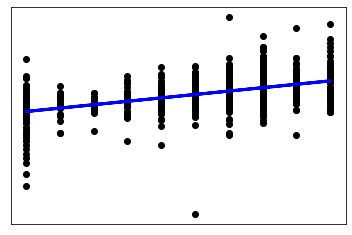

In [14]:
plt.scatter(rating1, polarity1,  color='black')
plt.plot(rating1, regr.predict(rating1), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## Movie 2

In [15]:
regr = linear_model.LinearRegression()
rating2 = movie2.rating.values.reshape(-1, 1)
polarity2 = movie2.review_polarity.values.reshape(-1, 1)
regr.fit(rating2,polarity2)

LinearRegression()

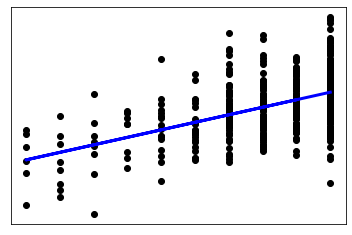

In [16]:
plt.scatter(rating2, polarity2,  color='black')
plt.plot(rating2, regr.predict(rating2), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## Movie 3

In [17]:
regr = linear_model.LinearRegression()
rating3 = movie3.rating.values.reshape(-1, 1)
polarity3 = movie3.review_polarity.values.reshape(-1, 1)
regr.fit(rating3,polarity3)

LinearRegression()

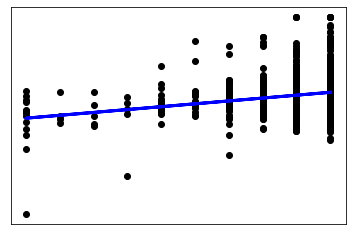

In [18]:
plt.scatter(rating3, polarity3,  color='black')
plt.plot(rating3, regr.predict(rating3), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## All Movies

In [19]:
regr = linear_model.LinearRegression()
ratings = movies.rating.values.reshape(-1, 1)
polarities = movies.review_polarity.values.reshape(-1, 1)
regr.fit(ratings,polarities)

LinearRegression()

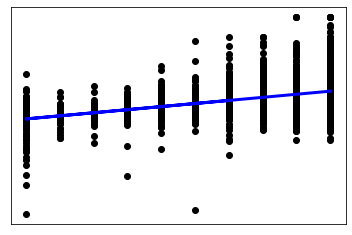

In [20]:
plt.scatter(ratings, polarities,  color='black')
plt.plot(ratings, regr.predict(ratings), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()